In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


#### Household Power Consumption


In [3]:
df = pd.read_csv("household_power_consumption.txt", sep=";", low_memory=False)

In [4]:
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
# Column-wise null count
null_counts = df.isnull().sum()
print(null_counts)

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64



##### Create new data frame extracting only the information we need.


In [7]:
# Combine 'Date' and 'Time' into a 'datetime' column
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Convert power columns to float
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')

# Calculate 'app_power'
df['app_power'] = np.sqrt(df['Global_active_power']**2 + df['Global_reactive_power']**2)

# Create the new DataFrame with required columns
new_df = df[['datetime', 'app_power']]

In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 2 columns):
 #   Column     Dtype         
---  ------     -----         
 0   datetime   datetime64[ns]
 1   app_power  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.7 MB


In [9]:
new_df.head()

,datetime,app_power
0,2006-12-16 17:24:00,4.236671
1,2006-12-16 17:25:00,5.377704
2,2006-12-16 17:26:00,5.397025
3,2006-12-16 17:27:00,5.411335
4,2006-12-16 17:28:00,3.703828


In [10]:
# Save new_df as a Feather file
new_df.to_feather('new_df.feather')

In [11]:
# Save new_df as a CSV file
new_df.to_csv('new_df.csv', index=False)


#### Considering the temp dataset we were able to obtain, we will delete the time portion of the 'datetime' column and rename the column to 'Date'


In [15]:
new_df = pd.read_feather('new_df.feather')

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 2 columns):
 #   Column     Dtype         
---  ------     -----         
 0   datetime   datetime64[ns]
 1   app_power  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.7 MB


In [17]:
new_df.head()

,datetime,app_power
0,2006-12-16 17:24:00,4.236671
1,2006-12-16 17:25:00,5.377704
2,2006-12-16 17:26:00,5.397025
3,2006-12-16 17:27:00,5.411335
4,2006-12-16 17:28:00,3.703828


In [18]:
# Rename the column 'datetime' to 'Date'
new_df.rename(columns={'datetime': 'Date'}, inplace=True)

# Remove the time portion of the 'Date' column (keep only YYYY-MM-DD)
new_df['Date'] = pd.to_datetime(new_df['Date']).dt.date

In [19]:
new_df.head()

,Date,app_power
0,2006-12-16,4.236671
1,2006-12-16,5.377704
2,2006-12-16,5.397025
3,2006-12-16,5.411335
4,2006-12-16,3.703828


In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   app_power  float64
dtypes: float64(1), object(1)
memory usage: 31.7+ MB


In [21]:
# Convert 'Date' column to datetime type
new_df['Date'] = pd.to_datetime(new_df['Date'])

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 2 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date       datetime64[ns]
 1   app_power  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.7 MB


In [23]:
new_df.head()

,Date,app_power
0,2006-12-16,4.236671
1,2006-12-16,5.377704
2,2006-12-16,5.397025
3,2006-12-16,5.411335
4,2006-12-16,3.703828


In [24]:
# Save new_df as a Feather file
new_df.to_feather('new_df.feather')


##### Now we will clean the temperature dataset and merge the data with new_df


In [26]:
temp_df = pd.read_csv('TG_STAID021582.txt', skipinitialspace=True) # dataset has some spaces after commas

In [27]:
temp_df.head()

,SOUID,DATE,TG,Q_TG
0,260524,19000101,76,0
1,260524,19000102,101,0
2,260524,19000103,79,0
3,260524,19000104,70,0
4,260524,19000105,45,0


In [28]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45595 entries, 0 to 45594
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SOUID   45595 non-null  int64
 1   DATE    45595 non-null  int64
 2   TG      45595 non-null  int64
 3   Q_TG    45595 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB



##### Form the 'DATE' values so they can be detected by pandas as datetime type.


In [30]:
temp_df['DATE'] = pd.to_datetime(temp_df['DATE'], format='%Y%m%d')

In [31]:
temp_df.head()

,SOUID,DATE,TG,Q_TG
0,260524,1900-01-01,76,0
1,260524,1900-01-02,101,0
2,260524,1900-01-03,79,0
3,260524,1900-01-04,70,0
4,260524,1900-01-05,45,0


In [32]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45595 entries, 0 to 45594
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   SOUID   45595 non-null  int64         
 1   DATE    45595 non-null  datetime64[ns]
 2   TG      45595 non-null  int64         
 3   Q_TG    45595 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.4 MB



##### The TG column contains the temperature reading in Celsius, but it is multiplied by ten to get rid of decimals. We will multiply that value by 10 to get the actual Celsius reading and convert it to Fahrenheit.


In [33]:
# Convert 'TG' from tenths of Celsius to Celsius
temp_df['Celsius'] = temp_df['TG'] * 0.1

# Convert Celsius to Fahrenheit and store in a new column 'temp'
temp_df['temp'] = (temp_df['Celsius'] * 1.8) + 32

# Drop the intermediate 'Celsius' column
temp_df.drop(columns=['Celsius'], inplace=True)

In [34]:
temp_df.head()

,SOUID,DATE,TG,Q_TG,temp
0,260524,1900-01-01,76,0,45.68
1,260524,1900-01-02,101,0,50.18
2,260524,1900-01-03,79,0,46.22
3,260524,1900-01-04,70,0,44.60
4,260524,1900-01-05,45,0,40.10



##### Now let's drop the SOUID, TG, and Q_TG columns.


In [35]:
temp_df.drop(columns=['SOUID', 'TG', 'Q_TG'], inplace=True)

In [36]:
temp_df.head()

,DATE,temp
0,1900-01-01,45.68
1,1900-01-02,50.18
2,1900-01-03,46.22
3,1900-01-04,44.60
4,1900-01-05,40.10


In [37]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45595 entries, 0 to 45594
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    45595 non-null  datetime64[ns]
 1   temp    45595 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 712.6 KB


In [38]:
# Save the DataFrame to a Feather file
temp_df.to_feather('temp_df.feather')

In [39]:
new_df.head()

,Date,app_power
0,2006-12-16,4.236671
1,2006-12-16,5.377704
2,2006-12-16,5.397025
3,2006-12-16,5.411335
4,2006-12-16,3.703828


In [40]:
new_df.tail()

,Date,app_power
2075254,2010-11-26,0.946
2075255,2010-11-26,0.944
2075256,2010-11-26,0.938
2075257,2010-11-26,0.934
2075258,2010-11-26,0.932



##### Let's merge the temp column into our dataset


In [41]:
# Merge the 'temp' column from temp_df into new_df using 'DATE' and 'Date' as keys
merged_df = pd.merge(new_df, temp_df[['DATE', 'temp']], 
                     left_on='Date', right_on='DATE', how='inner')

# Drop the extra 'DATE' column
merged_df.drop(columns=['DATE'], inplace=True)

In [42]:
merged_df.head()

,Date,app_power,temp
0,2006-12-16,4.236671,42.98
1,2006-12-16,5.377704,42.98
2,2006-12-16,5.397025,42.98
3,2006-12-16,5.411335,42.98
4,2006-12-16,3.703828,42.98


In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 3 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date       datetime64[ns]
 1   app_power  float64       
 2   temp       float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 47.5 MB


In [44]:
# Save the DataFrame to a Feather file
merged_df.to_feather('merged_df.feather')


##### Now we will add the app_power to get total for each day.


In [45]:
# Group by 'Date' and aggregate the columns
grouped_df = merged_df.groupby('Date', as_index=False).agg({
    'app_power': 'sum',  # Sum the app_power values for each Date
    'temp': 'first'      # Take the first (or any, since they are the same) temp value for each Date
})

In [46]:
grouped_df.head()

,Date,app_power,temp
0,2006-12-16,1210.250117,42.98
1,2006-12-17,3406.467166,40.10
2,2006-12-18,2222.018835,39.92
3,2006-12-19,1685.781483,36.68
4,2006-12-20,2241.770383,37.40


In [47]:
grouped_df.to_feather('dataset.feather')

In [48]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1442 non-null   datetime64[ns]
 1   app_power  1442 non-null   float64       
 2   temp       1442 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 33.9 KB


In [49]:
grouped_df.to_csv('dataset.csv', index=False)


##### I have decided we should include the 'Sub_metering_#' columns, but according to isnull().sum() Sub_metering_3' has 25979 null values. But according to the dataset website it should contain no missing data. Let's check it out.


In [5]:
df = pd.read_csv("household_power_consumption.txt", sep=";", na_values=["", " ", "NA"], low_memory=False)

In [6]:
print(df["Sub_metering_3"].head(10))

0    17.0
1    16.0
2    17.0
3    17.0
4    17.0
5    17.0
6    17.0
7    17.0
8    17.0
9    16.0
Name: Sub_metering_3, dtype: float64


In [7]:
print(df["Sub_metering_3"].unique())

[17. 16. 18.  9.  0.  5. 19. 10. 20.  8.  4.  2.  3. 11. 13.  6. 15. nan
 12.  1. 14.  7. 23. 25. 26. 28. 27. 21. 22. 29. 24. 30. 31.]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [9]:
print(df["Sub_metering_2"].unique())

['1.000' '2.000' '0.000' '16.000' '37.000' '36.000' '22.000' '12.000'
 '27.000' '20.000' '9.000' '4.000' '3.000' '5.000' '13.000' '35.000'
 '28.000' '26.000' '24.000' '21.000' '17.000' '33.000' '25.000' '23.000'
 '18.000' '30.000' '31.000' '7.000' '38.000' '29.000' '50.000' '71.000'
 '59.000' '62.000' '70.000' '40.000' '34.000' '8.000' '15.000' '6.000'
 '32.000' '19.000' '14.000' '49.000' '72.000' '73.000' '61.000' '39.000'
 '42.000' '10.000' '56.000' '11.000' '?' '43.000' '67.000' '63.000'
 '53.000' '65.000' '52.000' '69.000' '48.000' '74.000' '41.000' '47.000'
 '58.000' '68.000' '64.000' '75.000' '46.000' '57.000' '60.000' '66.000'
 '44.000' '78.000' '77.000' '76.000' '51.000' '55.000' '45.000' '54.000'
 '79.000' '80.000']


In [10]:
print(df["Sub_metering_1"].unique())

['0.000' '1.000' '2.000' '6.000' '37.000' '36.000' '38.000' '25.000'
 '12.000' '11.000' '9.000' '4.000' '33.000' '5.000' '34.000' '8.000'
 '26.000' '27.000' '15.000' '20.000' '21.000' '23.000' '16.000' '10.000'
 '39.000' '32.000' '?' '19.000' '35.000' '30.000' '40.000' '7.000'
 '31.000' '17.000' '3.000' '29.000' '24.000' '14.000' '41.000' '53.000'
 '76.000' '75.000' '77.000' '74.000' '28.000' '68.000' '58.000' '62.000'
 '13.000' '18.000' '22.000' '64.000' '71.000' '56.000' '72.000' '45.000'
 '42.000' '59.000' '66.000' '43.000' '44.000' '48.000' '46.000' '73.000'
 '55.000' '60.000' '70.000' '63.000' '67.000' '47.000' '65.000' '51.000'
 '50.000' '69.000' '78.000' '57.000' '49.000' '61.000' '52.000' '54.000'
 '79.000' '80.000' '81.000' '82.000' '83.000' '84.000' '88.000' '86.000'
 '87.000']


In [11]:
# Replace '?' with np.nan
df['Sub_metering_1'] = df['Sub_metering_1'].replace("?", np.nan)
df['Sub_metering_2'] = df['Sub_metering_2'].replace("?", np.nan)

In [12]:
# Convert to numeric, coercing errors to NaN
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors="coerce")
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors="coerce")
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors="coerce")  # Redundant, but ensures consistency

In [13]:
print(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].dtypes)

Sub_metering_1    float64
Sub_metering_2    float64
Sub_metering_3    float64
dtype: object


In [14]:
print(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].isnull().sum())

Sub_metering_1    25979
Sub_metering_2    25979
Sub_metering_3    25979
dtype: int64



##### So while 25979 is a large number, the number of entries in the dataset is 2075259, a much larger number. I have decided to fill in the missing data.


In [15]:
# Identify consecutive null groups for Sub_metering_3
null_gaps = df['Sub_metering_3'].isnull().astype(int).groupby(df['Sub_metering_3'].notnull().cumsum()).sum()

# Display the size of null gaps greater than 0
print(null_gaps[null_gaps > 0])

Sub_metering_3
6839          2
19722         2
41828         1
61904         1
98248         2
           ... 
1845496       1
1868395       1
1916303    7226
1964211    5237
2001433       1
Name: Sub_metering_3, Length: 71, dtype: int64


In [16]:
# Identify consecutive null groups for Sub_metering_2
null_gaps = df['Sub_metering_2'].isnull().astype(int).groupby(df['Sub_metering_2'].notnull().cumsum()).sum()

# Display the size of null gaps greater than 0
print(null_gaps[null_gaps > 0])

Sub_metering_2
6839          2
19722         2
41828         1
61904         1
98248         2
           ... 
1845496       1
1868395       1
1916303    7226
1964211    5237
2001433       1
Name: Sub_metering_2, Length: 71, dtype: int64


In [17]:
# Identify consecutive null groups for Sub_metering_1
null_gaps = df['Sub_metering_1'].isnull().astype(int).groupby(df['Sub_metering_1'].notnull().cumsum()).sum()

# Display the size of null gaps greater than 0
print(null_gaps[null_gaps > 0])

Sub_metering_1
6839          2
19722         2
41828         1
61904         1
98248         2
           ... 
1845496       1
1868395       1
1916303    7226
1964211    5237
2001433       1
Name: Sub_metering_1, Length: 71, dtype: int64


In [18]:
# Forward fill and backward fill for small gaps
df['Sub_metering_1'] = df['Sub_metering_1'].fillna(method='ffill', limit=5)
df['Sub_metering_1'] = df['Sub_metering_1'].fillna(method='bfill', limit=5)

# Interpolate for remaining large gaps
df['Sub_metering_1'] = df['Sub_metering_1'].interpolate(method='linear', limit_direction='both')

/tmp/ipykernel_13425/3214669798.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Sub_metering_1'] = df['Sub_metering_1'].fillna(method='ffill', limit=5)
/tmp/ipykernel_13425/3214669798.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Sub_metering_1'] = df['Sub_metering_1'].fillna(method='bfill', limit=5)


In [19]:
# Forward fill and backward fill for small gaps
df['Sub_metering_2'] = df['Sub_metering_2'].fillna(method='ffill', limit=5)
df['Sub_metering_2'] = df['Sub_metering_2'].fillna(method='bfill', limit=5)

# Interpolate for remaining large gaps
df['Sub_metering_2'] = df['Sub_metering_2'].interpolate(method='linear', limit_direction='both')

/tmp/ipykernel_13425/3004226653.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Sub_metering_2'] = df['Sub_metering_2'].fillna(method='ffill', limit=5)
/tmp/ipykernel_13425/3004226653.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Sub_metering_2'] = df['Sub_metering_2'].fillna(method='bfill', limit=5)


In [20]:
# Forward fill and backward fill for small gaps
df['Sub_metering_3'] = df['Sub_metering_3'].fillna(method='ffill', limit=5)
df['Sub_metering_3'] = df['Sub_metering_3'].fillna(method='bfill', limit=5)

# Interpolate for remaining large gaps
df['Sub_metering_3'] = df['Sub_metering_3'].interpolate(method='linear', limit_direction='both')

/tmp/ipykernel_13425/1506314993.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Sub_metering_3'] = df['Sub_metering_3'].fillna(method='ffill', limit=5)
/tmp/ipykernel_13425/1506314993.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Sub_metering_3'] = df['Sub_metering_3'].fillna(method='bfill', limit=5)


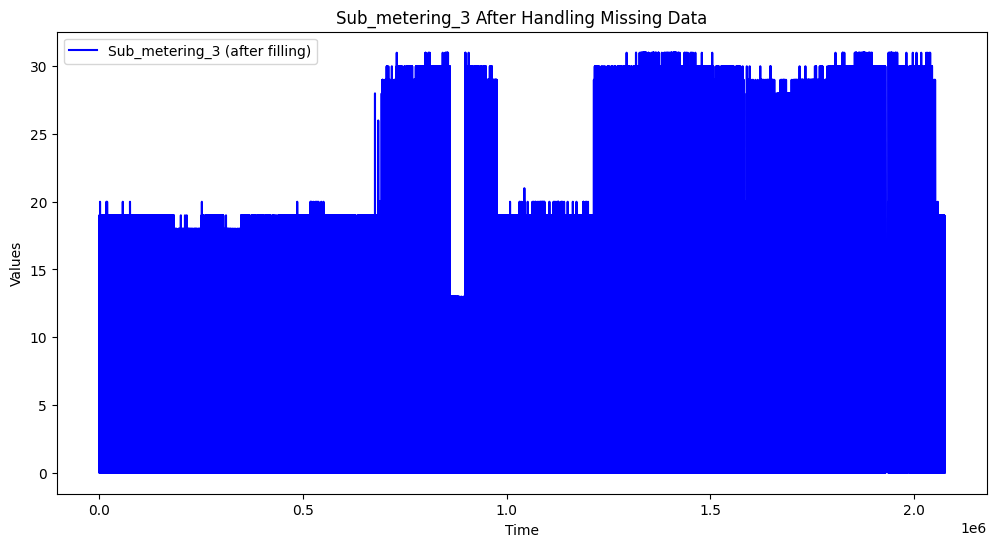

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Sub_metering_3'], label='Sub_metering_3 (after filling)', color='blue')
plt.title("Sub_metering_3 After Handling Missing Data")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()

In [22]:
print(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].isnull().sum())

Sub_metering_1    0
Sub_metering_2    0
Sub_metering_3    0
dtype: int64


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(3), object(6)
memory usage: 142.5+ MB


In [26]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.0,1.0,17.0


In [32]:
print(list(df["Sub_metering_3"].unique()))

[np.float64(17.0), np.float64(16.0), np.float64(18.0), np.float64(9.0), np.float64(0.0), np.float64(5.0), np.float64(19.0), np.float64(10.0), np.float64(20.0), np.float64(8.0), np.float64(4.0), np.float64(2.0), np.float64(3.0), np.float64(11.0), np.float64(13.0), np.float64(6.0), np.float64(15.0), np.float64(12.0), np.float64(1.0), np.float64(14.0), np.float64(7.0), np.float64(0.8), np.float64(1.7), np.float64(2.5), np.float64(3.3), np.float64(4.2), np.float64(5.8), np.float64(6.7), np.float64(7.5), np.float64(8.3), np.float64(9.2), np.float64(10.8), np.float64(11.7), np.float64(12.5), np.float64(13.3), np.float64(14.2), np.float64(15.8), np.float64(16.7), np.float64(17.5), np.float64(18.3), np.float64(19.2), np.float64(1.4), np.float64(2.8), np.float64(5.7), np.float64(7.1), np.float64(8.5), np.float64(9.9), np.float64(11.3), np.float64(12.8), np.float64(15.6), np.float64(23.0), np.float64(25.0), np.float64(26.0), np.float64(28.0), np.float64(27.0), np.float64(21.0), np.float64(22.0),

In [31]:
# Round to the nearest tenth (1 decimal place)
df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']] = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].round(1)

In [35]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.0,1.0,17.0


In [34]:
# Convert 'Date' column to datetime format and standardize to YYYY-MM-DD
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

# Ensure 'Date' column is of datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    object        
 3   Global_reactive_power  object        
 4   Voltage                object        
 5   Global_intensity       object        
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 142.5+ MB


In [37]:
# Group by 'Date' and sum the float columns
daily_sums = df.groupby('Date', as_index=False)[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()

# Display the resulting DataFrame
print(daily_sums.head())

        Date  Sub_metering_1  Sub_metering_2  Sub_metering_3
0 2006-12-16             0.0           546.0          4926.0
1 2006-12-17          2033.0          4187.0         13341.0
2 2006-12-18          1063.0          2621.0         14018.0
3 2006-12-19           839.0          7602.0          6197.0
4 2006-12-20             0.0          2648.0         14063.0


In [38]:
daily_sums.dtypes

Date              datetime64[ns]
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [39]:
daily_sums.to_feather('daily_sums.feather')

In [40]:
daily_sums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1442 non-null   datetime64[ns]
 1   Sub_metering_1  1442 non-null   float64       
 2   Sub_metering_2  1442 non-null   float64       
 3   Sub_metering_3  1442 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 45.2 KB


In [41]:
df = pd.read_feather('dataset.feather')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1442 non-null   datetime64[ns]
 1   app_power  1442 non-null   float64       
 2   temp       1442 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 33.9 KB



##### Let's merge the Sub_mertering columns into our dataset using 'Date' as the key.


In [43]:
# Merge 'daily_sums' into 'df' using 'Date' as the key
df = pd.merge(df, daily_sums[['Date', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']], 
              on='Date', how='left')

In [44]:
df.head()

,Date,app_power,temp,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1210.250117,42.98,0.0,546.0,4926.0
1,2006-12-17,3406.467166,40.10,2033.0,4187.0,13341.0
2,2006-12-18,2222.018835,39.92,1063.0,2621.0,14018.0
3,2006-12-19,1685.781483,36.68,839.0,7602.0,6197.0
4,2006-12-20,2241.770383,37.40,0.0,2648.0,14063.0


In [45]:
df.to_feather('dataset_current.feather')

In [46]:
df.tail()

,Date,app_power,temp,Sub_metering_1,Sub_metering_2,Sub_metering_3
1437,2010-11-22,2055.077640,40.82,4855.0,2110.0,10136.0
1438,2010-11-23,1593.457076,41.54,1871.0,458.0,7611.0
1439,2010-11-24,1809.263446,42.26,1096.0,2848.0,12224.0
1440,2010-11-25,1443.176559,38.12,1076.0,426.0,5072.0
1441,2010-11-26,1499.615294,33.98,1080.0,385.0,9989.0



##### Let's add 'price' column to the dataset.


In [47]:
# Define the price ranges and corresponding prices
price_ranges = [
    {'start': '2006-12-01', 'end': '2007-06-01', 'price': 0.1169},
    {'start': '2007-06-01', 'end': '2007-12-01', 'price': 0.1184},
    {'start': '2007-12-01', 'end': '2008-06-01', 'price': 0.1222},
    {'start': '2008-06-01', 'end': '2008-12-01', 'price': 0.1213},
    {'start': '2008-12-01', 'end': '2009-06-01', 'price': 0.1203},
    {'start': '2009-06-01', 'end': '2009-12-01', 'price': 0.1206},
    {'start': '2009-12-01', 'end': '2010-06-01', 'price': 0.1207},
    {'start': '2010-06-01', 'end': '2010-12-01', 'price': 0.1283},
    {'start': '2010-12-01', 'end': '2011-01-01', 'price': 0.1350}
]

# Function to determine the price for a given date
def assign_price(date):
    for r in price_ranges:
        if pd.Timestamp(r['start']) <= date < pd.Timestamp(r['end']):
            return r['price']
    return np.nan  # If the date doesn't fit any range

# Add the 'price' column to the DataFrame
df['price'] = df['Date'].apply(assign_price)

In [48]:
df.head()

,Date,app_power,temp,Sub_metering_1,Sub_metering_2,Sub_metering_3,price
0,2006-12-16,1210.250117,42.98,0.0,546.0,4926.0,0.1169
1,2006-12-17,3406.467166,40.10,2033.0,4187.0,13341.0,0.1169
2,2006-12-18,2222.018835,39.92,1063.0,2621.0,14018.0,0.1169
3,2006-12-19,1685.781483,36.68,839.0,7602.0,6197.0,0.1169
4,2006-12-20,2241.770383,37.40,0.0,2648.0,14063.0,0.1169


In [49]:
df.to_feather('dataset_current_base.feather')

In [50]:
# Display unique values in the 'price' column
unique_prices = df['price'].unique()
print(unique_prices)

[0.1169 0.1184 0.1222 0.1213 0.1203 0.1206 0.1207 0.1283]


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1442 non-null   datetime64[ns]
 1   app_power       1442 non-null   float64       
 2   temp            1442 non-null   float64       
 3   Sub_metering_1  1442 non-null   float64       
 4   Sub_metering_2  1442 non-null   float64       
 5   Sub_metering_3  1442 non-null   float64       
 6   price           1442 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 79.0 KB
